In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dispest.demod import demodulate, remodulate

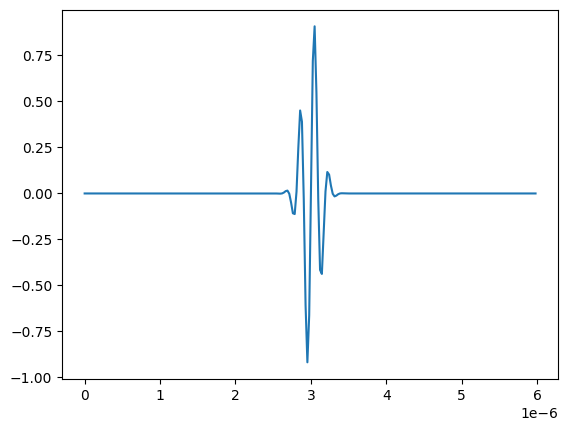

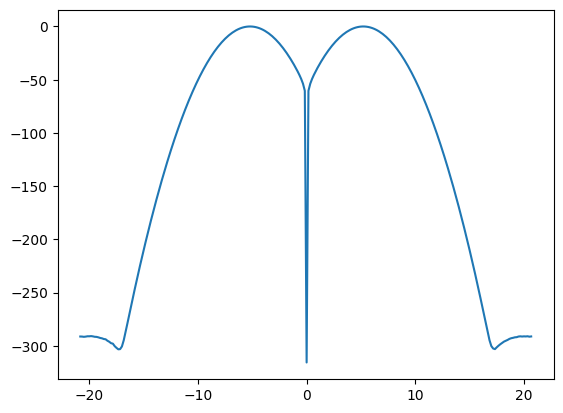

In [2]:
fs = 2*20.824E6
fc = 5.208E6
t0=3E-6
t = np.arange(0, 2*t0, 1/fs)
p = np.sin(2*np.pi*fc*(t-t0)) * np.exp(-(1.2*fc*(t-t0))**2)

plt.figure()
plt.plot(t, p)
plt.show()

mags = np.abs(np.fft.fft(p))
logged = np.fft.fftshift(20*np.log10(mags/np.max(mags)))
freqs = np.fft.fftshift(1E-6*np.fft.fftfreq(len(mags), 1/fs))
plt.figure()
plt.plot(freqs, logged)
plt.show()

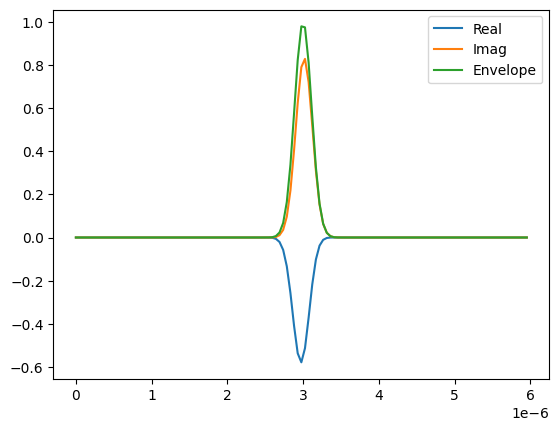

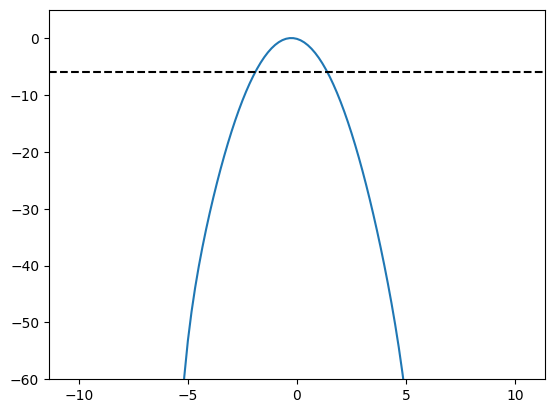

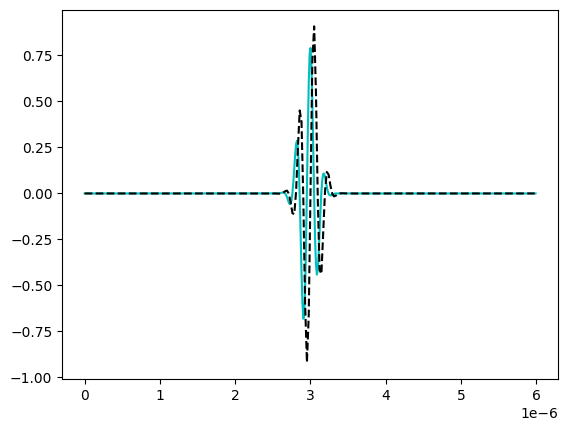

In [3]:
usf = 4
i, q, fs_new = demodulate(p, fs, 1.05*fc, 1.2*fc, usf=usf, dsf=2*usf)
t_new = np.arange(len(i))/fs_new

plt.figure()
plt.plot(t_new, i, label="Real")
plt.plot(t_new, q, label="Imag")
plt.plot(t_new, np.abs(i+1j*q), label="Envelope")
plt.legend()
plt.show()

mags = np.abs(np.fft.fft(i+1j*q))
logged = np.fft.fftshift(20*np.log10(mags/np.max(mags)))
freqs = np.fft.fftshift(1E-6*np.fft.fftfreq(len(mags), 1/fs_new))
plt.figure()
plt.plot(freqs, logged)
plt.axhline(-6, linestyle='--', color='k')
plt.ylim(-60, 5)
plt.show()

p_new, fs_new = remodulate(i, q, fs_new, fc, usf=usf, dsf=1)
t_new = np.arange(len(p_new))/fs_new

plt.figure()
plt.plot(t_new, p_new, color='c')
plt.plot(t, p, '--', color='k')
plt.show()